# MULTIDIMENSIONAL POVERTY CLASSIFICATION IN COSTA RICA USING DECISION TREES

## Jimena Campos Hernández
## Ana Laura Cortés Rojas 
## Adriana Marcela Fernández Mata

### Universidad Latinoamericana de Ciencia y Tecnología
#### Agosto, 2022

In [30]:
# Import required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
from pandas_profiling import ProfileReport
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.tree import plot_tree
import sklearn.metrics as metrics

In [2]:
#Load ENAHO csv file

data = pd.read_csv("NEW_ENAHO.csv")

In [3]:
# Replace NaN with 0.0

data.fillna(0.0, inplace=True)

In [4]:
#Show data

data

,Index,FACTOR,UPM,CUESTiONARiO,HOGAR,LiNEA,REGiON,ZONA,V1,V2A,...,iPM_PS3,iPM_PS4,iPM_intensidad,Q_iPCN,D_iPCN,Q_ZON_iPCN,D_ZON_iPCN,Q_REG_iPCN,D_REG_iPCN,iPM_Pobreza
0,1,158,1,2,1,1,1,1,3,1,...,0,0,0.0,5,9,5,9,5,9,0
1,2,158,1,2,1,2,1,1,3,1,...,0,0,0.0,5,9,5,9,5,9,0
2,3,158,1,2,1,3,1,1,3,1,...,0,0,0.0,5,9,5,9,5,9,0
3,4,158,1,2,1,4,1,1,3,1,...,0,0,0.0,5,9,5,9,5,9,0
4,5,158,1,3,1,1,1,1,3,3,...,0,0,0.0,4,7,4,7,3,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19186,19219,198,495,3,1,1,1,1,2,1,...,0,0,0.0,3,5,3,5,2,4,0
19187,19220,198,495,3,1,2,1,1,2,1,...,0,0,0.0,3,5,3,5,2,4,0
19188,19221,198,495,3,1,3,1,1,2,1,...,0,0,0.0,3,5,3,5,2,4,0
19189,19222,198,495,4,1,1,1,1,3,1,...,0,0,0.0,5,10,5,10,5,9,0


### Data Profiling

In [ ]:
pip install pandas_profiling

In [ ]:
pip install markupsafe==2.0.1

In [5]:
#Run profiling and create html file (this file is save on the same folder where the notebook is save)

profiling = ProfileReport(data, minimal=True)
profiling.to_file(output_file='ENAHO PROFILING.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
#Load Dictionary ENAHO csv file
#This is the information of the variables that were used and not used from the original file
#Original file source: http://sistemas.inec.cr/pad5/index.php/catalog/278/data-dictionary/F1?file_name=Enaho%202021

dictionary = pd.read_csv("Diccionario ENAHO.csv")
dictionary

,Variable Name,Variable Meaning,Use for the analysis
0,A10A,Primera mención de servicio recibido del Cen-C...,0
1,A10B,Segunda mención de servicio recibido del Cen-C...,0
2,A10C,Tercera mención de servicio recibido del Cen-C...,0
3,A11,Condición de aseguramiento,1
4,A12,Pensiones: régimen básico obligatorio,1
...,...,...,...
590,V7B,Estado del techo de la vivienda,1
591,V7C,Estado del piso de la vivienda,1
592,V8,Cantidad de cuartos para dormir de la vivienda,1
593,V9,Total de aposentos de la vivienda,1


## EDA

### Graph #1

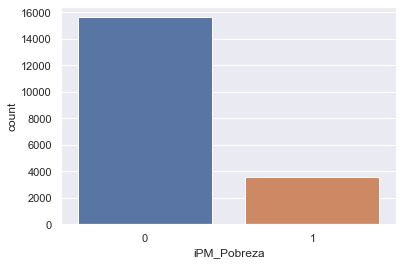

In [7]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='iPM_Pobreza', data=data)

Graph 1 represents the distribution of the data categorization based on the iPM_Pobreza variable, where 0 means "Not poor multidimensional"  and 1 means "Poor multidimensional". This graphs shows that the data is unbalanced since we have 15635 values categorized as 0 and only 3556 under category 1. 

### Graph #2

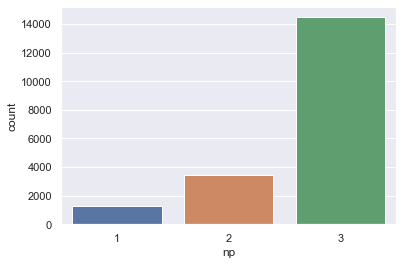

In [8]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='np', data=data)

Graph 2 shows the distribution of the data based on the np variable that clasiffies in 1 = "Extreme poverty", 2= "Not extreme poverty", 3= "Not poor" where again we can see unbalanced data with more values on the category 3 and the lowest amount of values on category 1. 

### Graph 3

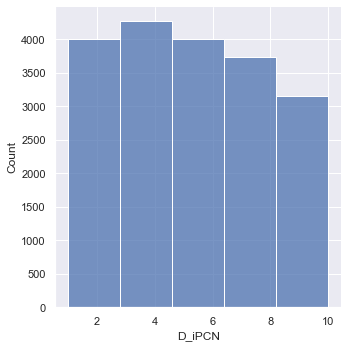

In [9]:
sns.set_theme(style="darkgrid")
sns.displot(data, x="D_iPCN", bins = 5)

Graph 3 is a histogram that shows the distribution of the sample based on "Per capita net household income decile" where we can see that most of the people have an income between ₡96749 and ₡165513. See image below with the income range for each category. 

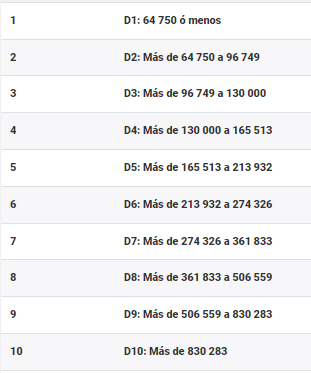

### Graph #4

<Figure size 1440x432 with 0 Axes>

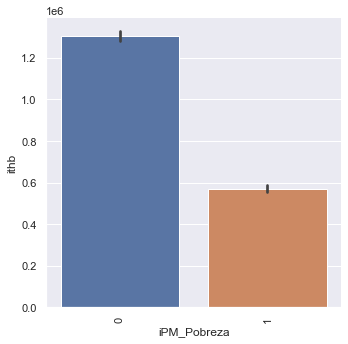

In [10]:
plt.figure(figsize=(20,6))
sns.catplot(data=data,x= 'iPM_Pobreza', y='ithb', kind='bar')
plt.xticks(rotation=90);

Graph 4 shows the distribution of the Total gross household income for each category of the iPM_Pobreza where we can see that the max income for people under "Not poor multidimensional" is an average of ₡1300000 and for people categorized as "Poor multidimensional" the average is ₡570000

### Graph #5

<Figure size 1440x432 with 0 Axes>

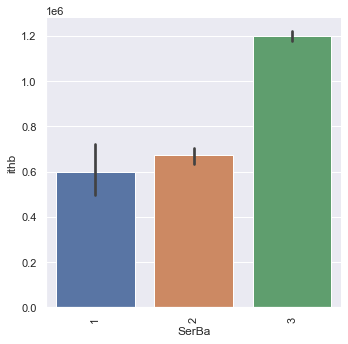

In [11]:
plt.figure(figsize=(20,6))
sns.catplot(data=data,x= 'SerBa', y='ithb', kind='bar')
plt.xticks(rotation=90);

Graph 5 shows the distribution of the Total gross household income based on basic service availability, where #1 means does not have basic services and the average is ₡600000, #2 is the ones that has poor basic services with an ithb of ₡670000 and the #3 is for the ones that has optimal basic services with an average of ₡1190000

### Feature Engineering

In [12]:
#Data to be used set up

array = data.values
X = array[:,0:302]
Y = array[:,302] # value to predict

In [13]:
#Model for feature selection

model = ExtraTreesClassifier(n_estimators=15)    
model.fit(X, Y)
print(model.feature_importances_)

[3.67247737e-03 4.18622744e-03 4.48825799e-03 3.62877444e-03
 2.87202715e-04 5.18122364e-04 2.78821029e-03 2.50236284e-03
 2.88928611e-03 3.72718026e-03 3.00421644e-03 3.51420850e-03
 4.89161070e-04 6.53256737e-03 4.07356919e-03 1.85672835e-03
 2.85146439e-02 1.98211705e-02 1.31808495e-02 7.39875464e-03
 3.54399015e-02 3.06207267e-03 1.64179323e-03 3.66202706e-03
 1.89588721e-03 1.31172018e-03 4.25862890e-03 8.80882640e-04
 5.45215465e-04 8.06711432e-05 1.97425930e-03 8.85637786e-04
 3.28825520e-03 2.67180888e-03 6.23625619e-03 5.21443892e-03
 7.09265756e-04 1.82041820e-03 1.57465170e-03 4.93127797e-04
 1.66431551e-03 3.22644149e-03 1.91030326e-03 1.69514595e-03
 2.79256703e-03 4.12437584e-03 2.23854798e-03 2.26684008e-03
 2.58242044e-03 3.96309922e-03 1.77407151e-03 6.90836296e-04
 0.00000000e+00 3.78434651e-03 3.43454725e-03 2.42074887e-03
 1.90956922e-03 1.94745183e-03 4.80974020e-03 3.61113121e-04
 6.80556201e-04 7.55547722e-04 9.52265198e-04 5.97690193e-04
 2.75382659e-04 8.888452

### Top 15 important features graph

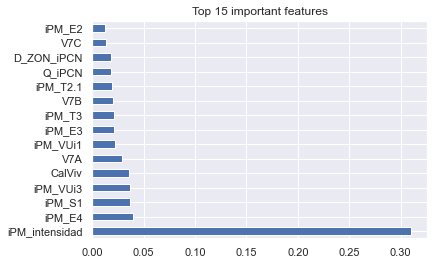

In [14]:
feat_importances = pd.Series(model.feature_importances_,data.columns[0:302])
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()

### Model Comparison

In [15]:
array = data.values
X = array[:,0:302]
Y = array[:,302]
Y=Y.astype('int')

# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('Tree', DecisionTreeClassifier()))
models.append(('Bayes', GaussianNB()))
models.append(('SVM', SVC(gamma='scale')))
models.append(('GBoost', GradientBoostingClassifier(random_state=0)))
models.append(('RandFor', RandomForestClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10,random_state = 100, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s -> accuracy: (%f), Standard Deviation: (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN -> accuracy: (0.860091), Standard Deviation: (0.007086)
Tree -> accuracy: (1.000000), Standard Deviation: (0.000000)
Bayes -> accuracy: (0.374811), Standard Deviation: (0.009145)
SVM -> accuracy: (0.814705), Standard Deviation: (0.008641)
GBoost -> accuracy: (1.000000), Standard Deviation: (0.000000)
RandFor -> accuracy: (1.000000), Standard Deviation: (0.000000)


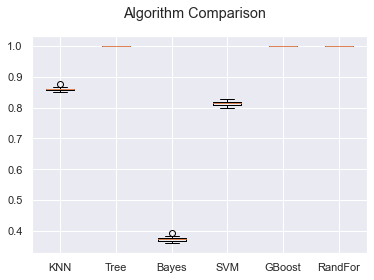

In [16]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

The results of the algorithm Comparison show that the models with the best accuracy are Decision Trees , Gradient Boosting and Random Forest with a 1.0 of accuracy, followed by KNN with a 0.86 of accuracy, and the model less recommended to use with this dataset is the Gaussian Naive Bayes.

### Using Decision Tree Classifiers for prediction

In [17]:
#Load dataset with only the variables indicated on the feature engineering
df= pd.read_csv("NEW_ENAHO_DT1.csv")
df.fillna(0, inplace=True)
df

,V7A,V7B,EFi,CalViv,np,iPM_E3,iPM_E4,iPM_VUi1,iPM_VUi2,iPM_VUi3,iPM_S1,iPM_S4,iPM_T2.1,iPM_T3,iPM_intensidad,iPM_Pobreza
0,3,2,2,3,3,0,0,0,0,0,0,0,0,0,0.0,No Pobre multidimensional
1,3,2,2,3,3,0,0,0,0,0,0,0,0,0,0.0,No Pobre multidimensional
2,3,2,2,3,3,0,0,0,0,0,0,0,0,0,0.0,No Pobre multidimensional
3,3,2,2,3,3,0,0,0,0,0,0,0,0,0,0.0,No Pobre multidimensional
4,1,3,1,1,3,0,0,1,1,1,0,0,0,0,0.0,No Pobre multidimensional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19186,3,3,3,4,3,0,0,0,0,0,0,0,0,0,0.0,No Pobre multidimensional
19187,3,3,3,4,3,0,0,0,0,0,0,0,0,0,0.0,No Pobre multidimensional
19188,3,3,3,4,3,0,0,0,0,0,0,0,0,0,0.0,No Pobre multidimensional
19189,3,3,3,4,3,0,0,0,0,0,0,0,0,0,0.0,No Pobre multidimensional


In [18]:
X= pd.get_dummies (df.drop ('iPM_Pobreza', axis = 1), drop_first = True)
y = df ['iPM_Pobreza']

In [19]:
# Creating splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [20]:
model = DecisionTreeClassifier ()

In [21]:
model.fit (X_train, y_train)

DecisionTreeClassifier()

In [22]:
base_preds = model.predict(X_test)

In [23]:
print (classification_report(y_test, base_preds))

                           precision    recall  f1-score   support

No Pobre multidimensional       1.00      1.00      1.00      4678
   Pobre multidimensional       1.00      1.00      1.00      1080

                 accuracy                           1.00      5758
                macro avg       1.00      1.00      1.00      5758
             weighted avg       1.00      1.00      1.00      5758



C:\Users\adrim\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


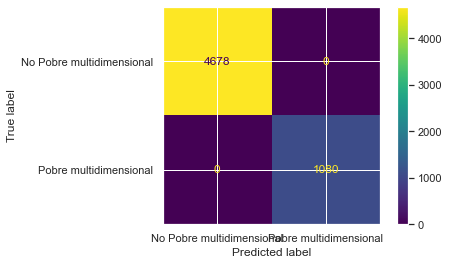

In [24]:
plot_confusion_matrix (model, X_test, y_test)

In [25]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [26]:
X.columns

Index(['V7A', 'V7B', 'EFi', 'CalViv', 'np', 'iPM_E3', 'iPM_E4', 'iPM_VUi1',
       'iPM_VUi2', 'iPM_VUi3', 'iPM_S1', 'iPM_S4', 'iPM_T2.1', 'iPM_T3',
       'iPM_intensidad'],
      dtype='object')

In [27]:
pd.DataFrame (index = X.columns, data = model.feature_importances_, columns = ['feature importances']).sort_values ('feature importances', ascending = False)

,feature importances
iPM_intensidad,1.0
V7A,0.0
V7B,0.0
EFi,0.0
CalViv,0.0
np,0.0
iPM_E3,0.0
iPM_E4,0.0
iPM_VUi1,0.0
iPM_VUi2,0.0


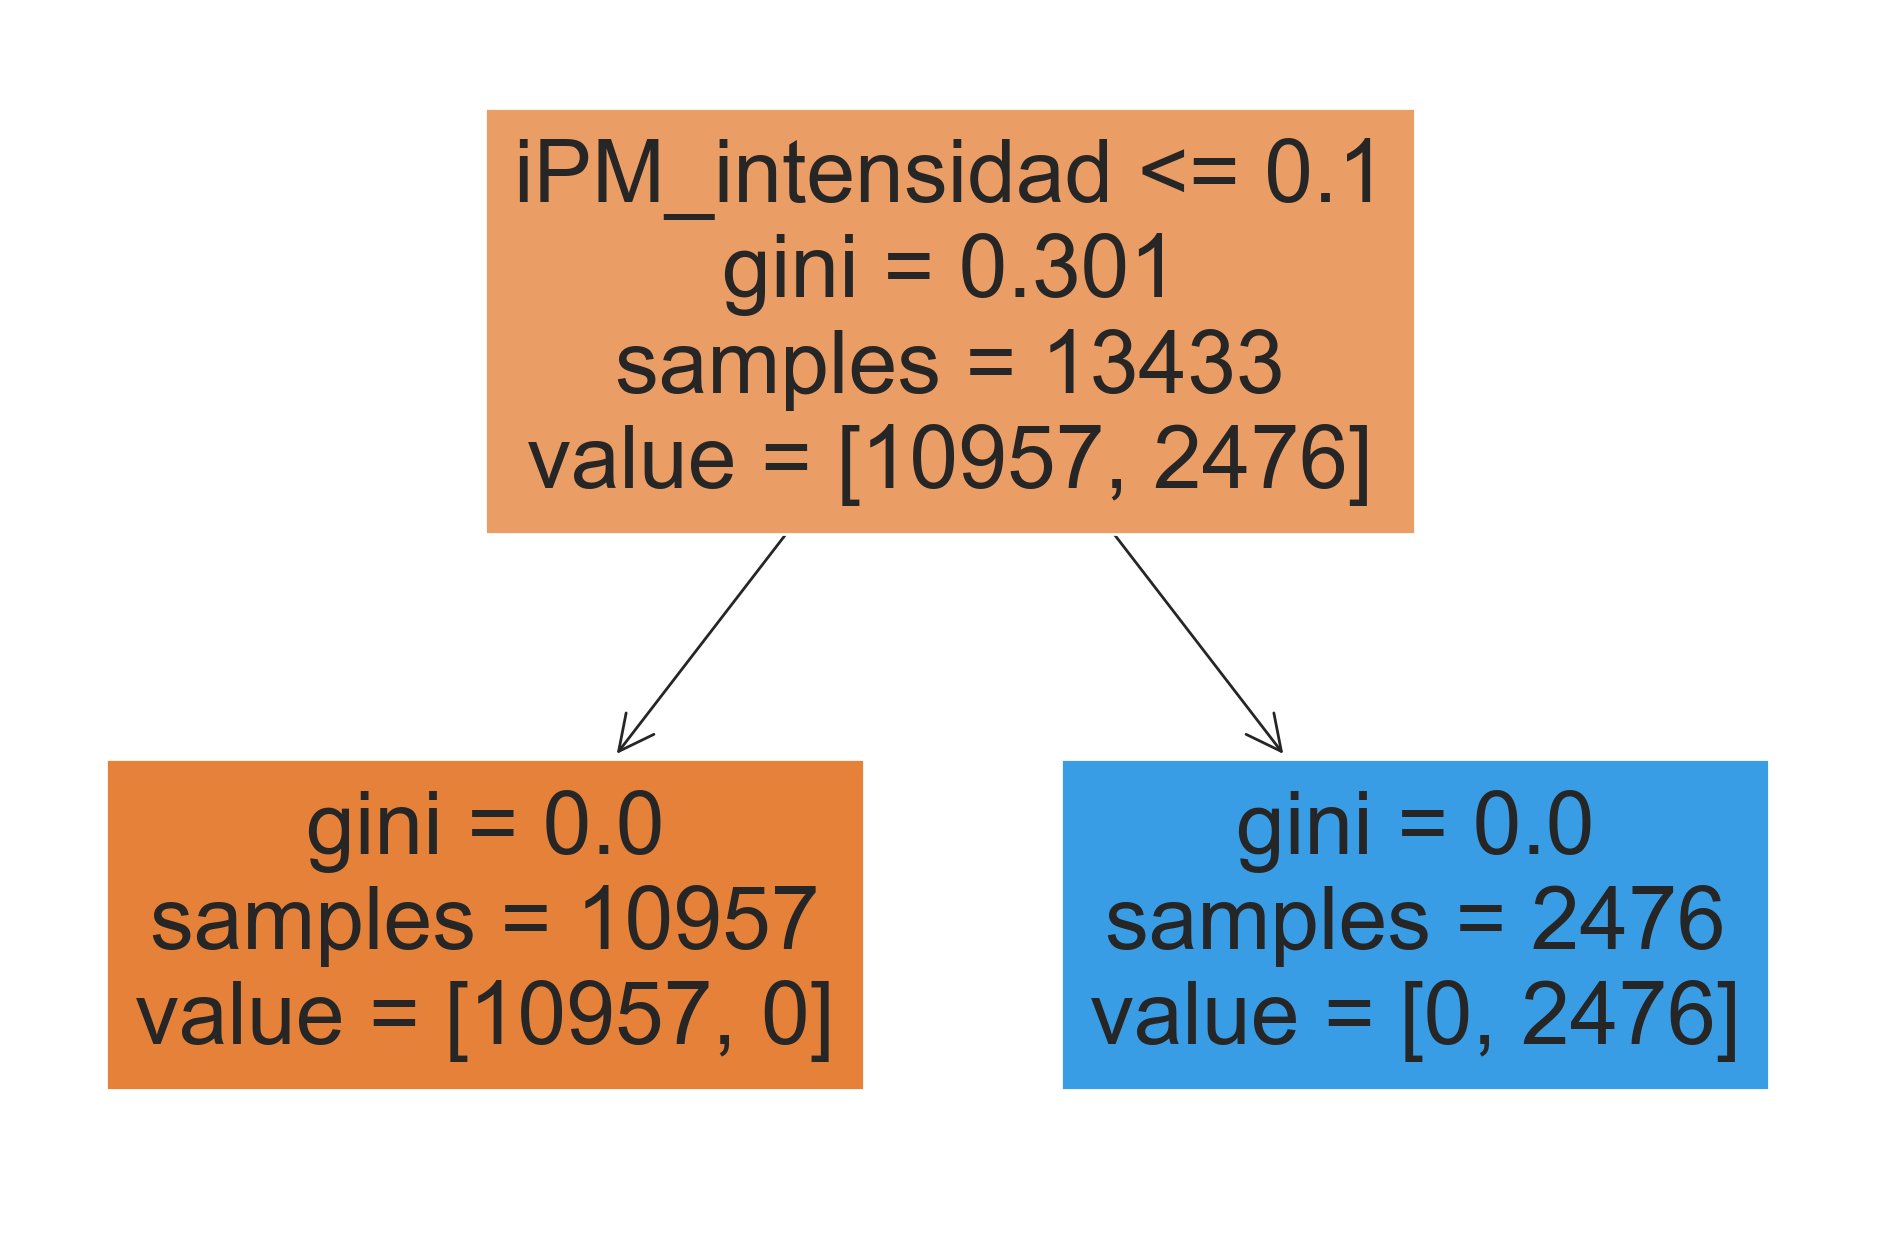

In [28]:
plt.figure (figsize = (12,8),dpi = 200)
plot_tree(model, feature_names = X.columns, filled = True );

In [31]:
print("Accuracy:",metrics.accuracy_score(y_test, base_preds))

Accuracy: 1.0


According to the results of the decision tree we can conclude that the accuracy is 1.0 using only "iPM_intensidad" to classify. 

## Decision tree without iPM_intensidad and np variables

In [32]:
#Load ENAHO csv file

datani = pd.read_csv("NEW_ENAHO_NI.csv")
datani.fillna(0.0, inplace=True)

In [33]:
array = datani.values
X = array[:,0:300]
Y = array[:,300] # value to predict

In [34]:
model = ExtraTreesClassifier(n_estimators=10)    

model.fit(X, Y)
print(model.feature_importances_)

[5.65398126e-03 6.45704251e-03 5.41201998e-03 7.13142716e-03
 1.48891434e-04 8.12208691e-04 3.98620845e-03 3.15058600e-03
 4.76728733e-03 5.28920575e-03 4.42843655e-03 6.17336095e-03
 8.11013725e-04 1.60319445e-02 5.52114280e-03 3.08979066e-03
 2.63715945e-02 2.15746080e-02 1.04378639e-02 1.03934223e-02
 1.24374776e-02 5.70649773e-03 2.28206134e-03 5.49896655e-03
 1.88336517e-03 1.34122217e-03 5.67181732e-03 3.21154098e-03
 8.84959275e-04 1.32372038e-04 2.33002964e-03 1.10698198e-03
 5.12012200e-03 6.68702380e-03 6.29154596e-03 1.14433888e-02
 1.49236956e-03 3.95952806e-03 2.41552135e-03 1.13737624e-03
 2.31772792e-03 1.06129010e-02 2.25738873e-03 1.91107544e-03
 5.80277582e-03 1.02263315e-02 3.63748127e-03 6.56977364e-03
 3.94504865e-03 5.96242189e-03 1.66868292e-03 1.10528418e-03
 0.00000000e+00 3.53777329e-03 7.32723808e-03 2.92645193e-03
 4.24709068e-03 4.24446600e-03 9.40981167e-03 9.24988916e-04
 1.80758667e-03 1.45427785e-03 3.20637502e-03 5.48538394e-04
 4.86858875e-04 2.700738

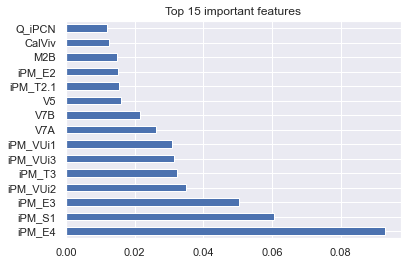

In [35]:
feat_importances = pd.Series(model.feature_importances_,datani.columns[0:300])
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()

In [36]:
#Load dataset with only the variables indicated on the feature engineering
df= pd.read_csv("NEW_ENAHO_DT2.csv")
df.fillna(0, inplace=True)
df

,V5,V7A,V7C,CalViv,M2B,iPM_E2,iPM_E3,iPM_E4,iPM_VUi1,iPM_VUi3,iPM_S1,iPM_T1,iPM_T2.2,iPM_T3,D_ZON_iPCN,iPM_Pobreza
0,1,3,2,3,1,0,0,0,0,0,0,0,0,0,9,No Pobre Multidimensional
1,1,3,2,3,1,0,0,0,0,0,0,0,0,0,9,No Pobre Multidimensional
2,1,3,2,3,1,0,0,0,0,0,0,0,0,0,9,No Pobre Multidimensional
3,1,3,2,3,1,0,0,0,0,0,0,0,0,0,9,No Pobre Multidimensional
4,1,1,1,1,1,0,0,0,1,1,0,0,0,0,7,No Pobre Multidimensional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19186,1,3,3,4,0,0,0,0,0,0,0,0,0,0,5,No Pobre Multidimensional
19187,1,3,3,4,0,0,0,0,0,0,0,0,0,0,5,No Pobre Multidimensional
19188,1,3,3,4,0,0,0,0,0,0,0,0,0,0,5,No Pobre Multidimensional
19189,1,3,3,4,0,0,0,0,0,0,0,0,0,0,10,No Pobre Multidimensional


In [37]:
X= pd.get_dummies (df.drop ('iPM_Pobreza', axis = 1), drop_first = True)
y = df ['iPM_Pobreza']

In [38]:
# Creating splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [39]:
model = DecisionTreeClassifier (max_depth = 4, max_leaf_nodes=12)

In [40]:
model.fit (X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=12)

In [41]:
base_preds = model.predict(X_test)

In [42]:
print (classification_report(y_test, base_preds))

                           precision    recall  f1-score   support

No Pobre Multidimensional       0.89      0.98      0.93      4678
   Pobre Multidimensional       0.86      0.47      0.61      1080

                 accuracy                           0.89      5758
                macro avg       0.88      0.73      0.77      5758
             weighted avg       0.88      0.89      0.87      5758



C:\Users\adrim\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


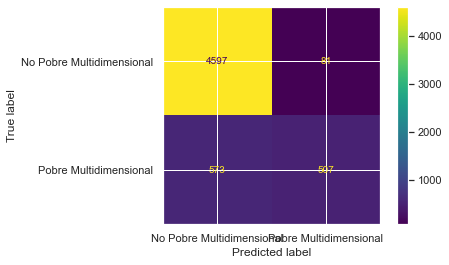

In [43]:
plot_confusion_matrix (model, X_test, y_test)

In [44]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.13219994, 0.        ,
       0.        , 0.10148547, 0.36588037, 0.08703382, 0.03292903,
       0.22160956, 0.02995574, 0.        , 0.02890607, 0.        ])

In [45]:
X.columns

Index(['V5', 'V7A', 'V7C', 'CalViv', 'M2B', 'iPM_E2', 'iPM_E3', 'iPM_E4',
       'iPM_VUi1', 'iPM_VUi3', 'iPM_S1', 'iPM_T1', 'iPM_T2.2', 'iPM_T3',
       'D_ZON_iPCN'],
      dtype='object')

In [46]:
pd.DataFrame (index = X.columns, data = model.feature_importances_, columns = ['feature importances']).sort_values ('feature importances', ascending = False)

,feature importances
iPM_E4,0.365880
iPM_S1,0.221610
CalViv,0.132200
iPM_E3,0.101485
iPM_VUi1,0.087034
iPM_VUi3,0.032929
iPM_T1,0.029956
iPM_T3,0.028906
V5,0.000000
V7A,0.000000


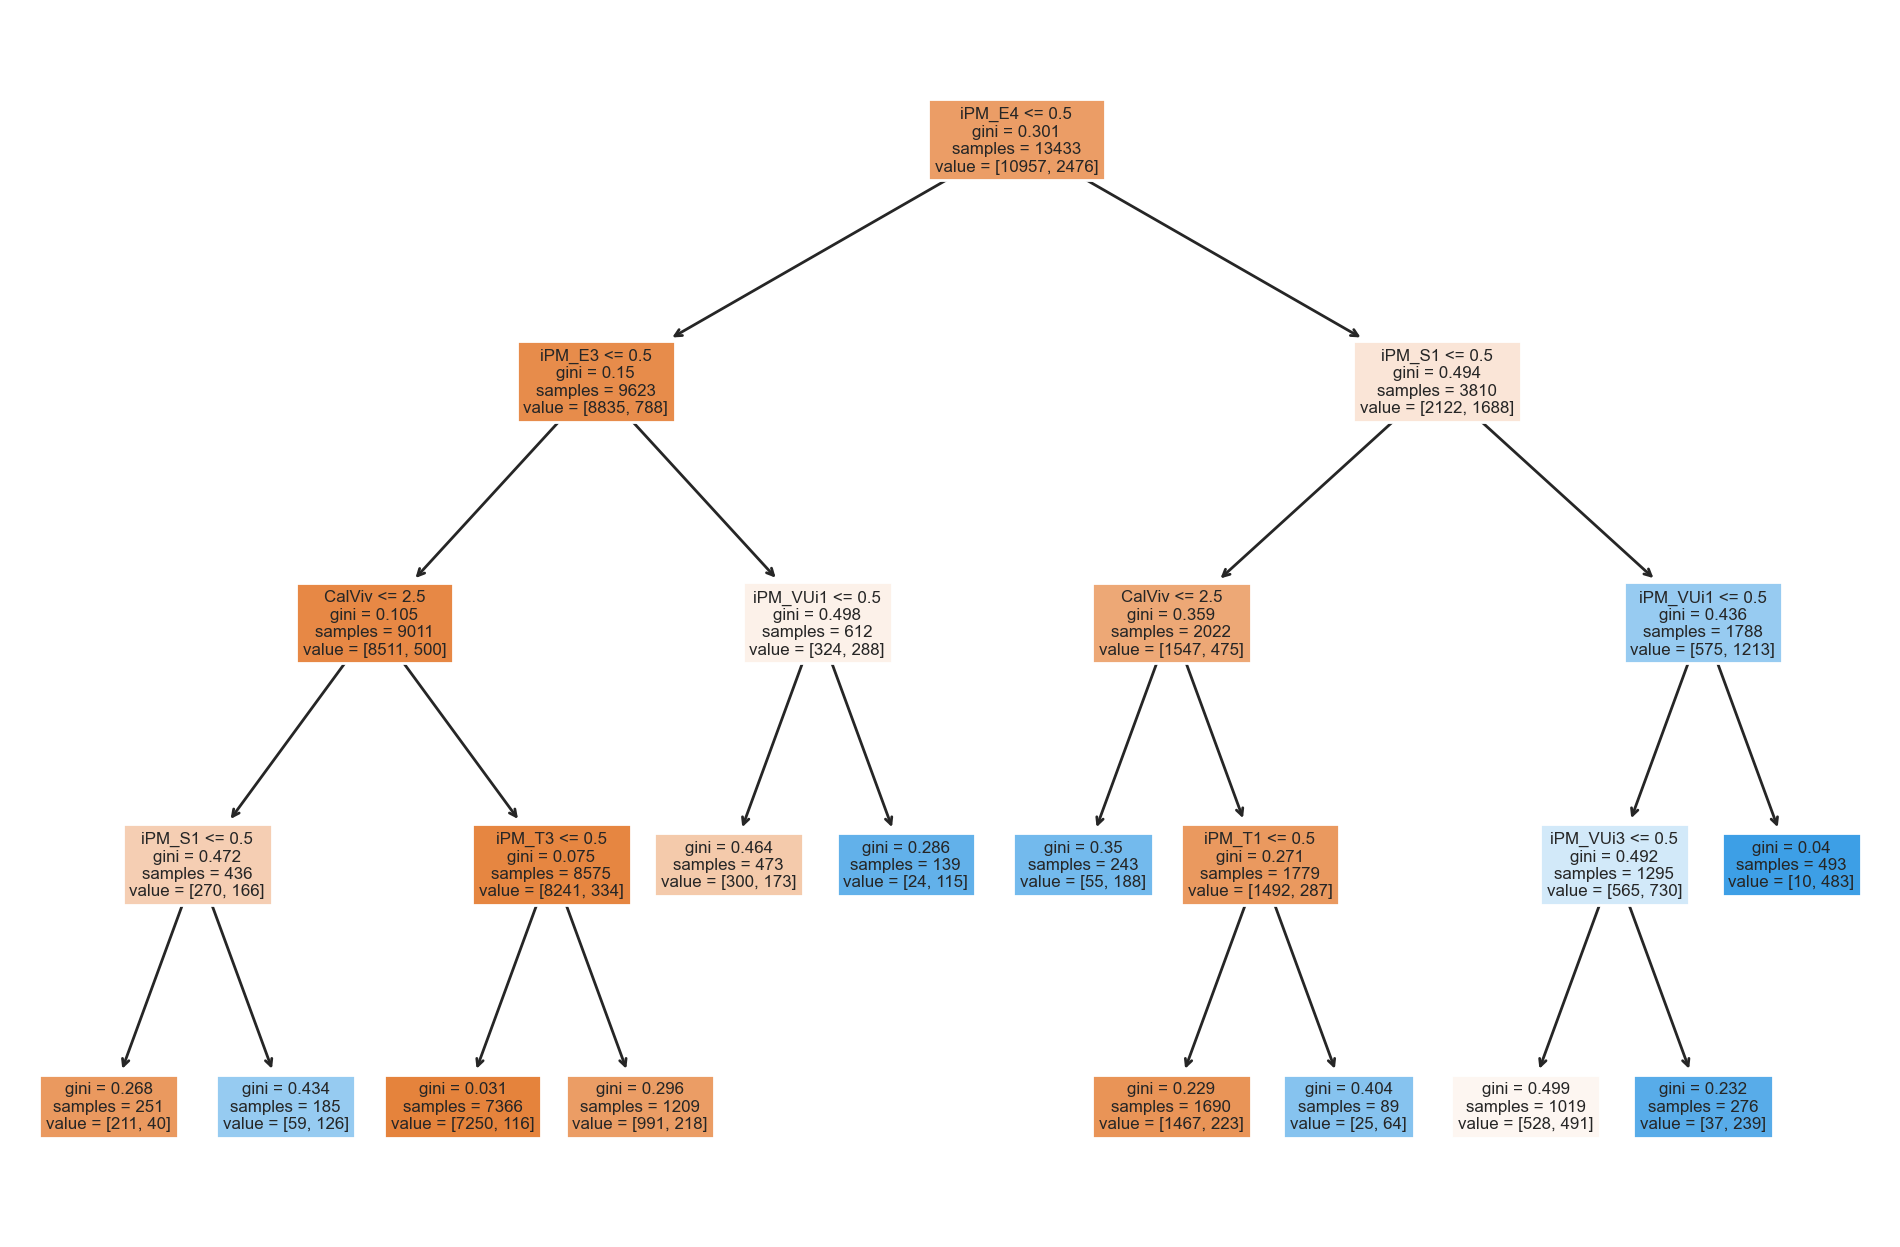

In [47]:
plt.figure (figsize = (12,8),dpi = 200)
plot_tree(model, feature_names = X.columns, filled = True );

In [48]:
print("Accuracy:",metrics.accuracy_score(y_test, base_preds))

Accuracy: 0.886418895449809


According to the results of the decision tree we can conclude that the accuracy is 0.88 if we use the variables iPM_E4, iPM_E3, iPM_S1, CalViv, iPM_VUi1, iPM_S1, iPM_T3, iPM_T1 and iPM_VUi3 (Details of each variable meaning can be found on the file "Diccionario ENAHO"